<a href="https://colab.research.google.com/github/Sukalp-Jhingran/Speech-to-text-Convertor/blob/main/Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install jiwer ft

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 38.9 MB/s eta 0:00:00
  Created wheel for ft: filename=ft-1.0.0-py3-none-any.whl size=4662 sha256=660a1259fcf7ffdacf0333e958277266e57d3138dae7dd65b6ea55d5f3ffef27
  Stored in directory: /root/.cache/pip/wheels/24/4f/47/2077ceb8fb9041e1ce233984ebf934858856399cfa009390ae
Successfully built ft


In [ ]:
from jiwer import wer

ref = "hello world"
hyp = "hello duck"
print("WER:", wer(ref, hyp))

WER: 0.5


In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from IPython import display
from jiwer import wer


In [ ]:
dataset_url = "https://keithito.com/LJ-Speech-Dataset/"


In [ ]:
from tensorflow import keras

data_url = "https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2"
data_path = keras.utils.get_file(
    fname="LJSpeech-1.1",
    origin=data_url,
    extract=True,
    archive_format='tar',
    cache_dir='.',
)


2748572632/2748572632 ━━━━━━━━━━━━━━━━━━━━ 27s 0us/step


In [ ]:
import tarfile
import os
import urllib.request

In [ ]:
url = "https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2"
download_path = "LJSpeech-1.1.tar.bz2"
if not os.path.exists(download_path):
    urllib.request.urlretrieve(url, download_path)

In [ ]:
extracted_dir = "LJSpeech-1.1"
if not os.path.exists(extracted_dir):
    with tarfile.open(download_path, "r:bz2") as tar:
        tar.extractall()

/tmp/ipython-input-1085978042.py:4: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()


In [ ]:
import pandas as pd
metadata_path = os.path.join(extracted_dir, "metadata.csv")
metadata_df = pd.read_csv(metadata_path, sep="|", header=None, quoting=3)


In [ ]:
wavs_path = extracted_dir + "/wavs/"
metadata_path = data_path + "/metadata.csv"

In [ ]:
import csv


In [ ]:
metadata_path = "datasets/LJSpeech-1.1/metadata.csv"

In [ ]:
print(metadata_df.head(10))


            0                                                  1  \
0  LJ001-0001  Printing, in the only sense with which we are ...   
1  LJ001-0002                     in being comparatively modern.   
2  LJ001-0003  For although the Chinese took impressions from...   
3  LJ001-0004  produced the block books, which were the immed...   
4  LJ001-0005  the invention of movable metal letters in the ...   
5  LJ001-0006  And it is worth mention in passing that, as an...   
6  LJ001-0007  the earliest book printed with movable types, ...   
7  LJ001-0008                          has never been surpassed.   
8  LJ001-0009  Printing, then, for our purpose, may be consid...   
9  LJ001-0010  Now, as all books not primarily intended as pi...   

                                                   2  
0  Printing, in the only sense with which we are ...  
1                     in being comparatively modern.  
2  For although the Chinese took impressions from...  
3  produced the block books, wh

In [ ]:
metadata_df.tail()

,0,1,2
13095,LJ050-0274,made certain recommendations which it believes...,made certain recommendations which it believes...
13096,LJ050-0275,materially improve upon the procedures in effe...,materially improve upon the procedures in effe...
13097,LJ050-0276,"As has been pointed out, the Commission has no...","As has been pointed out, the Commission has no..."
13098,LJ050-0277,with the active cooperation of the responsible...,with the active cooperation of the responsible...
13099,LJ050-0278,the recommendations we have here suggested wou...,the recommendations we have here suggested wou...


In [ ]:
metadata_df.columns = ["file_name", "transcription", "normalized_transcription"]
metadata_df = metadata_df[["file_name","normalized_transcription"]]
metadata_df = metadata_df.sample(frac=1).reset_index(drop=True)
metadata_df.head(3)

,file_name,normalized_transcription
0,LJ009-0216,Hanging in chains upon the gibbet which had se...
1,LJ049-0127,agencies other than the Secret Service have be...
2,LJ032-0025,the officers of Klein's discovered that a rifl...


In [ ]:
split = int(len(metadata_df) * 0.90)
df_train = metadata_df[:split]
df_val = metadata_df[split: ]
print(f"Size of the training set: {len(df_train)}")
print(f"Size of the training set: {len(df_val)}")

Size of the training set: 11790
Size of the training set: 1310


**Preprocessing**


---

We first prepare the vocabulary to be used.

In [ ]:
# The set of characters accepted in the transcription
characters = [x for x in "abcdefghijklmnopqrstuvwxyz'?! "]

# Mapping characters to integers
char_to_num = keras.layers.StringLookup(vocabulary=characters, oov_token="")

# Mapping integers back to original characters
num_to_char = keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

# Print vocabulary and size
print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size = {char_to_num.vocabulary_size()})"
)


The vocabulary is: ['', np.str_('a'), np.str_('b'), np.str_('c'), np.str_('d'), np.str_('e'), np.str_('f'), np.str_('g'), np.str_('h'), np.str_('i'), np.str_('j'), np.str_('k'), np.str_('l'), np.str_('m'), np.str_('n'), np.str_('o'), np.str_('p'), np.str_('q'), np.str_('r'), np.str_('s'), np.str_('t'), np.str_('u'), np.str_('v'), np.str_('w'), np.str_('x'), np.str_('y'), np.str_('z'), np.str_("'"), np.str_('?'), np.str_('!'), np.str_(' ')] (size = 31)


In [ ]:
char_to_num

<StringLookup name=string_lookup, built=False>

In [ ]:
# Constants
frame_length = 256
frame_step = 160
fft_length = 384

def encode_single_sample(wav_file, label):


    # 1. Read wav file
    file = tf.io.read_file(wavs_path + wav_file + ".wav")

    # 2. Decode the wav file
    audio, _ = tf.audio.decode_wav(file)
    audio = tf.squeeze(audio, axis=-1)

    # 3. Change type to float
    audio = tf.cast(audio, tf.float32)

    # 4. Get the spectrogram
    spectrogram = tf.signal.stft(
        audio,
        frame_length=frame_length,
        frame_step=frame_step,
        fft_length=fft_length
    )

    # 5. Get magnitude and apply root compression
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.math.pow(spectrogram, 0.5)

    # 6. Normalize
    means = tf.math.reduce_mean(spectrogram, 1, keepdims=True)
    stddevs = tf.math.reduce_std(spectrogram, 1, keepdims=True)
    spectrogram = (spectrogram - means) / (stddevs + 1e-10)

    # 7. Process the label
    label = tf.strings.lower(label)
    label = tf.strings.unicode_split(label, input_encoding="UTF-8")
    label = char_to_num(label)

    # 8. Return spectrogram and encoded label
    return spectrogram, label


In [ ]:
batch_size=32
# define the training dataset
train_dataset=tf.data.Dataset.from_tensor_slices(
    (list(df_train["file_name"]),list(df_train["normalized_transcription"]))
)
train_dataset=(
    train_dataset.map(encode_single_sample,num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)
# define the validation dataset
validation_dataset=tf.data.Dataset.from_tensor_slices(
    (list(df_val["file_name"]),list(df_val["normalized_transcription"]))
)
validation_dataset=(
    validation_dataset.map(encode_single_sample,num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

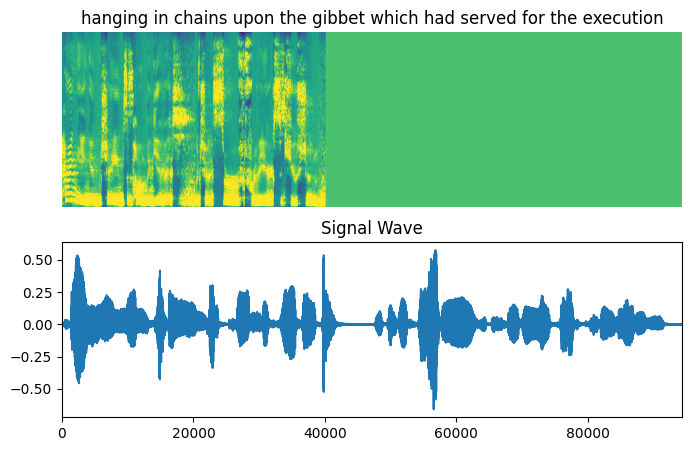

In [ ]:
fig = plt.figure(figsize=(8, 5))
for batch in train_dataset.take(1):
    spectogram = batch[0][0].numpy().T  # transpose only
    label = batch[1][0]
    label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")

    # Plot spectrogram
    ax = plt.subplot(2, 1, 1)
    ax.imshow(spectogram, vmax=1, aspect='auto', origin='lower')
    ax.set_title(label)
    ax.axis("off")

    # Plot waveform
file_name = list(df_train["file_name"])[0]
file = tf.io.read_file(wavs_path + file_name + ".wav")
audio, _ = tf.audio.decode_wav(file)
audio = audio.numpy()
audio = np.squeeze(audio)
audio = np.clip(audio, -1.0, 1.0)  #  Fix for display.Audio

ax = plt.subplot(2, 1, 2)
plt.plot(audio)
ax.set_title("Signal Wave")
ax.set_xlim(0, len(audio))

display.display(display.Audio(audio, rate=16000))

In [ ]:
def CTCLoss(y_true,y_pred):
  # compute the training-time loss value
  batch_len=tf.cast(tf.shape(y_true)[0],dtype="int64")
  input_length=tf.cast(tf.shape(y_true)[0],dtype="int64")
  label_length=tf.cast(tf.shape(y_true)[0],dtype="int64")

  input_length=input_length* tf.ones(shape=(Batch_len,1), dtype="int64")
  label_length=label_length* tf.ones(shape=(Batch_len,1), dtype="int64")

  loss=keras.backend.ctc_batch_cost(y_true,y_pred,input_length,label_length)
  return loss

In [ ]:
def build_model(input_dim,output_dim,rnn_layers=5,rnn_units=128):
  # model similar to deepspeech2
  input_spectrogram=layers.Input((None,input_dim),name="input")
  x=layers.Reshape((-1,input_dim,1),name="expand_dim")(input_spectrogram)
  x=layers.Conv2D(
      filters=32,
      kernel_size=[11,41],
      strides=[2,2],
      padding="same",
      use_bias=False,
      name="conv_1",
  )(x)
  x=layers.BatchNormalization(name="conv_1_bn")(x)
  x=layers.ReLU(name="conv_1_relu")(x)
  # convulation layer 2
  x=layers.Conv2D(
      filters=32,
      kernel_size=[11,21],
      strides=[1,2],
      padding="same",
      use_bias=False,
      name="conv_2",
  )(x)
  x=layers.BatchNormalization(name="conv_2_bn")(x)
  x=layers.ReLU(name="conv_2_relu")(x)
  # reshape the resulted volume to feed the rnns layers
  x=layers.Reshape((-1,x.shape[-2]*x.shape[-1]))(x)
  # RNN layers
  for i in range(1,rnn_layers+1):
    recurrent=layers.GRU(
        units=rnn_units,
        activation="tanh",
        recurrent_activation="sigmoid",
        use_bias=True,
        return_sequences=True,
        reset_after=True,
        name=f"gru_{i}",
    )
    x=layers.Bidirectional(
        recurrent,name=f"bidirectional_{i}",merge_mode="concat"
    )(x)
    if i<rnn_layers:
      x=layers.Dropout(rate=0.5)(x)
    # dense layer
    x=layers.Dense(units=rnn_units*2,name=f"dense_1",)(x)
    x=layers.ReLU(name=f"dense_1_relu")(x)
    x=layers.Dropout(rate=0.5)(x)
    # classification layer
    output=layers.Dense(units=output_dim+1,activation="softmax")(x)
    # model
    model=keras.Model(input_spectrogram,output,name="DeepSpeech_2")
    # Optimizer
    opt=keras.optimizers.Adam(learning_rate=1e-4)
    # Compile the model and return
    model.compile(optimizer=opt,loss=CTCLoss)
    return model

# get the model
model=build_model(
    input_dim=fft_length//2+1,
    output_dim=char_to_num.vocabulary_size(),
    rnn_units=512,
)
model.summary(line_length=110)

Model: "DeepSpeech_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                   ┃ Output Shape                        ┃             Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                             │ (None, None, 193)                   │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ expand_dim (Reshape)                           │ (None, None, 193, 1)                │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_1 (Conv2D)                                │ (None, None, 97, 32)                │              14,432 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_1_bn (BatchNormalization)                 │ (None, None, 97, 32)                │                 128 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_1_relu (ReLU)                             │ (None, None, 97, 32)                │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_2 (Conv2D)                                │ (None, None, 49, 32)                │             236,544 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_2_bn (BatchNormalization)                 │ (None, None, 49, 32)                │                 128 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_2_relu (ReLU)                             │ (None, None, 49, 32)                │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ reshape (Reshape)                              │ (None, None, 1568)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ bidirectional_1 (Bidirectional)                │ (None, None, 1024)                  │           6,395,904 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dropout (Dropout)                              │ (None, None, 1024)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dense_1 (Dense)                                │ (None, None, 1024)                  │           1,049,600 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dense_1_relu (ReLU)                            │ (None, None, 1024)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dropout_1 (Dropout)                            │ (None, None, 1024)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dense (Dense)                                  │ (None, None, 32)                    │              32,800 │
└────────────────────────────────────────────────┴─────────────────────────────────────┴─────────────────────┘

 Total params: 7,729,536 (29.49 MB)

 Trainable params: 7,729,408 (29.49 MB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0]

    # Iterate over the results and get back the text
    output_text = []
    for result in results:
        result = tf.strings.reduce_join(num_to_char(result)).numpy().decode("utf-8")
        output_text.append(result)
    return output_text

# A callback class to output a few transcriptions during training
class CallbackEval(keras.callbacks.Callback):
    def __init__(self, dataset):
        super().__init__()
        self.dataset = dataset

    def on_epoch_end(self, epoch, logs=None):
        predictions = []
        targets = []
        for batch in self.dataset:
            X, y = batch
            batch_predictions = model.predict(X)
            batch_predictions = decode_batch_predictions(batch_predictions)
            predictions.extend(batch_predictions)
            for label in y:
                label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
                targets.append(label)

        wer_score = wer(targets, predictions)
        print("-" * 100)
        print(f"Word Error Rate: {wer_score:.4f}")
        print("-" * 100)

        for i in np.random.randint(0, len(predictions), 2):
            print(f"Target:     {targets[i]}")
            print(f"Prediction: {predictions[i]}")
            print("-" * 100)


In [ ]:
def CTCLoss(y_true, y_pred):
    # y_pred: (batch_size, time_steps, vocab_size)
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(), loss=CTCLoss)


In [ ]:
# تفعيل GPU وتحسين الإعدادات
import tensorflow as tf
from tensorflow import keras
import os

# تفعيل GPU
print("TensorFlow version:", tf.__version__)
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

# إعدادات الذاكرة للنموذج
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # السماح بالنمو التدريجي للذاكرة
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(f"{len(gpus)} Physical GPUs, {len(logical_gpus)} Logical GPUs")
    except RuntimeError as e:
        print(e)

# تحسين أداء البيانات
AUTOTUNE = tf.data.AUTOTUNE

# تعديل دالة encode_single_sample لتعمل بشكل أفضل مع GPU
@tf.function
def encode_single_sample(wav_file, label):
    # الكود الأصلي للدالة هنا
    file = tf.io.read_file(wavs_path + wav_file + ".wav")
    audio, _ = tf.audio.decode_wav(file)
    audio = tf.squeeze(audio, axis=-1)
    audio = tf.cast(audio, tf.float32)

    spectrogram = tf.signal.stft(
        audio,
        frame_length=frame_length,
        frame_step=frame_step,
        fft_length=fft_length
    )

    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.math.pow(spectrogram, 0.5)

    means = tf.math.reduce_mean(spectrogram, 1, keepdims=True)
    stddevs = tf.math.reduce_std(spectrogram, 1, keepdims=True)
    spectrogram = (spectrogram - means) / (stddevs + 1e-10)

    label = tf.strings.lower(label)
    label = tf.strings.unicode_split(label, input_encoding="UTF-8")
    label = char_to_num(label)

    return spectrogram, label

# تحسين datasets
train_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_train["file_name"]), list(df_train["normalized_transcription"]))
)
train_dataset = (
    train_dataset.map(encode_single_sample, num_parallel_calls=AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=AUTOTUNE)
)

validation_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_val["file_name"]), list(df_val["normalized_transcription"]))
)
validation_dataset = (
    validation_dataset.map(encode_single_sample, num_parallel_calls=AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=AUTOTUNE)
)

print("Datasets optimized for GPU")

TensorFlow version: 2.19.0
GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Physical devices cannot be modified after being initialized
Datasets optimized for GPU


In [ ]:
# التحقق من استخدام GPU
import tensorflow as tf
print("Devices available:")
for device in tf.config.list_physical_devices():
    print(f" - {device}")

# اختبار بسيط على GPU
with tf.device('/GPU:0'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    c = tf.matmul(a, b)
    print("Matrix multiplication result:")
    print(c)
    print("Operation executed on:", c.device)

Devices available:
 - PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
 - PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Matrix multiplication result:
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)
Operation executed on: /job:localhost/replica:0/task:0/device:GPU:0


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# إعدادات التدريب المحسنة لـ GPU
epochs = 5

# callbacks إضافية لتحسين التدريب
callbacks = [
    validation_callback,
    ModelCheckpoint(
        'best_model.h5',
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=False,
        mode='min',
        verbose=1
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        min_lr=1e-7,
        verbose=1
    ),
    tf.keras.callbacks.TensorBoard(
        log_dir='./logs',
        histogram_freq=1
    )
]

# التدريب مع إعدادات محسنة لـ GPU
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=validation_dataset,
    callbacks=callbacks,
    verbose=1,
    # إعدادات إضافية لتحسين الأداء
)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━━

369/369 ━━━━━━━━━━━━━━━━━━━━ 1837s 5s/step - loss: 322.2995 - val_loss: 262.8108 - learning_rate: 0.0010
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

369/369 ━━━━━━━━━━━━━━━━━━━━ 656s 2s/step - loss: 197.0587 - val_loss: 135.8410 - learning_rate: 0.0010
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

369/369 ━━━━━━━━━━━━━━━━━━━━ 655s 2s/step - loss: 126.2272 - val_loss: 95.4566 - learning_rate: 0.0010
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4

369/369 ━━━━━━━━━━━━━━━━━━━━ 654s 2s/step - loss: 97.9895 - val_loss: 83.5574 - learning_rate: 0.0010
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 51

369/369 ━━━━━━━━━━━━━━━━━━━━ 653s 2s/step - loss: 82.2513 - val_loss: 74.1390 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.


In [ ]:
# epochs = 5
# validation_callback = CallbackEval(validation_dataset)

# history = model.fit(
#     train_dataset,
#     validation_data=validation_dataset,
#     epochs=epochs,
#     callbacks=[validation_callback],
# )


In [ ]:
predictions=[]
targets=[]
for batch in validation_dataset:
  X,y=batch
  batch_predictions=model.predict(X)
  batch_predictions=decode_batch_predictions(batch_predictions)
  predictions.extend(batch_predictions)
  for label in y:
    label=tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
    targets.append(label)
wer_score=wer(targets,predictions)
print("-"*100)
print(f"Word Error Rate: {wer_score:.4f}")
print("-"*100)
for i in np.random.randint(0,len(predictions),5):
  print(f"Target: {targets[i]}")
  print(f"Prediction: {predictions[i]}")
  print("-"*100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
!pip install rouge-score
import numpy as np
import tensorflow as tf
from jiwer import wer, cer
from nltk.translate.bleu_score import corpus_bleu
from rouge_score import rouge_scorer

predictions = []
targets = []

# Collect predictions and ground-truth labels
for batch in validation_dataset:
    X, y = batch
    batch_predictions = model.predict(X)
    batch_predictions = decode_batch_predictions(batch_predictions)
    predictions.extend(batch_predictions)

    for label in y:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        targets.append(label)

# -------------------------
# Evaluation Metrics
# -------------------------

# 1. Word Error Rate (WER)
wer_score = wer(targets, predictions)

# 2. Character Error Rate (CER)
cer_score = cer(targets, predictions)

# 3. BLEU Score (corpus-level, n-gram overlap)
# BLEU expects tokenized references and candidates
references = [[t.split()] for t in targets]   # list of lists of reference tokens
candidates = [p.split() for p in predictions] # list of hypothesis tokens
bleu_score = corpus_bleu(references, candidates)

# 4. ROUGE-L (longest common subsequence)
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
rouge_scores = [scorer.score(t, p)['rougeL'].fmeasure for t, p in zip(targets, predictions)]
avg_rougeL = np.mean(rouge_scores)

# -------------------------
# Print Results
# -------------------------
print("="*100)
print(f"Word Error Rate (WER): {wer_score:.4f}")
print(f"Character Error Rate (CER): {cer_score:.4f}")
print(f"BLEU Score: {bleu_score:.4f}")
print(f"Average ROUGE-L F1: {avg_rougeL:.4f}")
print("="*100)

# Show random examples
for i in np.random.randint(0, len(predictions), 5):
    print(f"Target: {targets[i]}")
    print(f"Prediction: {predictions[i]}")
    print("-"*100)



  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=8d1cb1b5fb966da285e352ec25969fd54708bc764f82633006ad4ed0dfd00dae
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge-score
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/ste

In [ ]:
# Save full model
model.save("my_model.h5")   # or model.save("my_model.keras")


In [ ]:
model.save("my_model.h5")
print("Saved model to disk")



Saved model to disk


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save to Drive
model.save('/content/drive/MyDrive/my_model.h5')  # TensorFlow


